# **Failure Prediction** ⚙️

# **Table of Contents**


1. [Problem Statement](#problem-statement)
   - [Introduction](#introduction)
   - [Dataset Overview](#dataset-overview)
2. [Import Libraries and Data](#import-libraries-and-data)
3. [Data Analysis and Visualization](#data-analysis-and-visualization)
4. [Preprocessing](#preprocessing)
   - [1. Check for Missing Values](#1-check-for-missing-values)
   - [2. Check for Outliers](#2-check-for-outliers)
   - [3. Categorical Variables Encoding](#3-categorical-variables-encoding)
   - [4. Dataset Splitting](#4-dataset-splitting)
5. [Modeling and Prediction](#modeling-and-prediction)
   - [Model 1: Logistic Regression](#model-1-logistic-regression)
   - [Model 2: Decision Tree](#model-2-decision-tree)
   - [Model 3: Random Forest](#model-3-random-forest)
   - [Model 4: Ada Boost](#model-4-ada-boost)
   - [Model 5: KNN](#model-5-knn)
   - [Model 6: SVM](#model-6-svm)
   - [Model 7: Stacking](#model-7-stacking)
   - [Model 8: Neural Networks](#model-8-neural-networks)
6. [Feature Importance](#feature-importance)
7. [Results](#results)

<a name='problem-statement'></a>

# **Problem Statement**

<a name='introduction'></a>

## **Introduction**

In industrial environments, **predictive maintenance** has emerged as a transformative approach, allowing organizations to anticipate equipment failures before they happen. Unlike traditional maintenance methods, such as preventive or reactive maintenance, predictive maintenance leverages data from machinery to identify patterns that indicate potential breakdowns. By utilizing machine learning and analytics, this approach not only minimizes unplanned downtimes and maintenance costs but also extends the lifespan of equipment, ensuring smoother and more reliable operations.

The **Machine Predictive Maintenance Classification dataset** on Kaggle serves as an ideal resource for developing and testing predictive maintenance models. It contains 10,000 records of various machine performance metrics, along with labels indicating machine failures and types of failures. Key features in the dataset include environmental conditions like air and process temperature, machine operational parameters such as rotational speed and torque, and tool wear time. Each of these factors can contribute to machine wear, offering valuable insights for predicting when and why equipment might fail.

This dataset provides an excellent foundation for building models that can predict equipment failures, allowing researchers and practitioners to explore both binary classification (failure vs. no failure) and multi-class classification (specific failure types). By analyzing these machine performance metrics, data scientists can gain insights into the optimal operational parameters that minimize wear and identify conditions most likely to lead to failures. Ultimately, the dataset supports the goal of implementing robust predictive maintenance strategies that reduce costs and improve machine reliability in industrial settings.

<a name='dataset-overview'></a>

## **Dataset Overview**

- **Total Records**: 10,000 rows of data
- **Context**: This dataset captures various machine operational features along with a target label for machine failure. It’s structured to facilitate machine learning classification tasks, helping predict when a machine is likely to fail and the type of failure.

**Columns and Features:**

1. **UDI (Unique Device Identifier)**: A unique identifier for each machine entry.
2. **Product ID**: The ID of the product type, which is a categorical identifier related to different machine types.
3. **Type**: Categorical feature representing the type of machine or product. This field allows for analysis across various machine types.
4. **Air Temperature [K]**: The temperature of the air surrounding the machine in Kelvin. This is important as environmental conditions can impact machine wear and failure.
5. **Process Temperature [K]**: The temperature within the machine’s internal process in Kelvin, influencing performance and potentially correlating with specific failure modes.
6. **Rotational Speed [rpm]**: The rotational speed of the machine in revolutions per minute. High rotational speeds may correlate with certain types of wear and breakdowns.
7. **Torque [Nm]**: The torque applied by the machine in Newton meters. Higher torques often increase wear and may be linked to certain failure types.
8. **Tool Wear [min]**: Measures the wear of the tool in minutes, indicating the usage level and remaining tool life.
9. **Target Label (Failure)**:
   - **Target**: Binary label indicating if a failure occurred (0 for No Failure, 1 for Failure).
   - **Failure Type**: Specifies the type of failure when the target is marked as "Failure." Types include **Heat Dissipation Failure**, **Power Failure**, **Overstrain Failure**, **Tool Wear Failure**, and **Random Failures**.

**Advantages:**

- **Feature Richness**: The dataset includes a wide range of machine-specific and environmental parameters, making it useful for comprehensive analysis.
- **Labelled for Classification**: The dataset is labeled, enabling supervised learning approaches.
- **Versatility**: Suitable for different types of machine learning tasks, including binary classification (failure vs. no failure) and multi-class classification (predicting specific failure types).


This dataset is valuable for predictive maintenance projects, allowing practitioners to experiment with real-world industrial data to anticipate and prevent machine failures.

<a name='import-libraries-and-data'></a>

# **Import Libraries and Data**


In [73]:
# data manipulation and analysis, numerical operations
import pandas as pd
import numpy as np

# data visualisation
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

# preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from scipy.stats import zscore

# ML models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neural_network import MLPClassifier
import tensorflow as tf
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.backend import clear_session

# evaluations
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_auc_score, RocCurveDisplay, roc_curve, auc
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# to display the total number columns present in the dataset
pd.set_option('display.max_columns', None)

In [33]:
# Reading the dataset from a CSV file into a DataFrame.
# This dataset contains machine performance metrics, which will help us predict potential equipment failures.
df = pd.read_csv('predictive_maintenance.csv')

<a name='data-analysis-and-visualization'></a>

# **Data Analysis and Visualization**

In [34]:
# Dropping First two columns
df = df.iloc[:, 2:]

In [ ]:
# Displaying the first few rows of the dataset to understand the data structure.
df.head(3)

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,M,298.1,308.6,1551,42.8,0,0,No Failure
1,L,298.2,308.7,1408,46.3,3,0,No Failure
2,L,298.1,308.5,1498,49.4,5,0,No Failure


In [ ]:
df.shape

(10000, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Type                     10000 non-null  object 
 1   Air temperature [K]      10000 non-null  float64
 2   Process temperature [K]  10000 non-null  float64
 3   Rotational speed [rpm]   10000 non-null  int64  
 4   Torque [Nm]              10000 non-null  float64
 5   Tool wear [min]          10000 non-null  int64  
 6   Target                   10000 non-null  int64  
 7   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(3), object(2)
memory usage: 625.1+ KB


In [ ]:
# Summarizing the dataset's numeric features to understand key statistics like mean, std, min, and max.
df.describe()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [ ]:
# Summarizing the dataset's numeric features to understand key statistics like mean, std, min, and max.
df.describe(include=object).T

,count,unique,top,freq
Type,10000,3,L,6000
Failure Type,10000,6,No Failure,9652


In [ ]:
fig = make_subplots(rows=1, cols=2, specs=[[{'type': 'domain'}, {'type': 'domain'}]])

# First donut chart for the 'Target' variable
fig.add_trace(go.Pie(labels=df['Target'].unique(), values=df['Target'].value_counts(), name='Target',
                     marker_colors=['gold', 'mediumturquoise', 'lightcoral', 'lightblue']), 1, 1)

# Second donut chart for the 'Failure Type' variable
fig.add_trace(go.Pie(labels=df['Failure Type'].unique(), values=df['Failure Type'].value_counts(), name='Failure Type',
                     marker_colors=['darkorange', 'lightgreen', 'purple', 'lightpink', 'cyan']), 1, 2)

# Styling the donut charts
fig.update_traces(hole=0.5, textfont_size=20, marker=dict(line=dict(color='black', width=2)))

# Adding layout and annotations for each donut chart
fig.update_layout(title_text='<b>Target and Failure Type Distributions<b>',
                  annotations=[dict(text='Target', x=0.2, y=0.5, font_size=20, showarrow=False),
                 dict(text='Failure Type', x=0.83, y=0.5, font_size=20, showarrow=False)])

fig.show()

In [ ]:
# Calculating and printing counts and percentages for 'Target' variable
print("Target Variable Distribution:\n")
target_counts = df['Target'].value_counts()
total_target = len(df['Target'])
for category, count in target_counts.items():
    percentage = (count / total_target) * 100
    print(f"Category {category}: {count} examples, {percentage:.2f}%")

print("\nFailure Type Variable Distribution:\n")
# Calculating and printing counts and percentages for 'Failure Type' variable
failure_type_counts = df['Failure Type'].value_counts()
total_failure_type = len(df['Failure Type'])
for category, count in failure_type_counts.items():
    percentage = (count / total_failure_type) * 100
    print(f"Category {category}: {count} examples, {percentage:.2f}%")

Target Variable Distribution:

Category 0: 9661 examples, 96.61%
Category 1: 339 examples, 3.39%

Failure Type Variable Distribution:

Category No Failure: 9652 examples, 96.52%
Category Heat Dissipation Failure: 112 examples, 1.12%
Category Power Failure: 95 examples, 0.95%
Category Overstrain Failure: 78 examples, 0.78%
Category Tool Wear Failure: 45 examples, 0.45%
Category Random Failures: 18 examples, 0.18%


This visualization shows the distributions of two key variables, **Target** and **Failure Type**, represented as donut charts side-by-side. The charts give insight into the balance and variety of outcomes within each category:

1. **Left Plot - Target Distribution**:
   - This donut chart shows the proportion of entries classified under the "Target" variable, which likely represents whether a failure occurred or not.
   - The majority of the data (96.6%) falls into the category labeled **0** (presumably "No Failure"), represented in **yellow**.
   - A smaller portion, **3.39%**, falls into the category labeled **1** (presumably "Failure"), represented in **turquoise**.
   - This indicates that most observations in the dataset are non-failure cases, with failures being relatively rare.

2. **Right Plot - Failure Type Distribution**:
   - This donut chart breaks down the types of failures within the dataset for entries where failures have occurred.
   - The largest section, covering **96.5%** of the chart in **orange**, is labeled "No Failure," indicating a predominance of non-failure cases in this variable as well.
   - The remaining segments represent various specific failure types, each occupying a small proportion of the data:
     - **Power Failure** (1.12%) - represented in **green**
     - **Tool Wear Failure** (0.95%) - represented in **purple**
     - **Overstrain Failure** (0.78%) - represented in **pink**
     - **Random Failures** (0.45%) - represented in **cyan**
     - **Heat Dissipation Failure** (0.18%) - represented in **blue**
   - This breakdown highlights the rarity of each specific failure type, with "Power Failure" being the most common among the failure cases.

The charts suggest a significant imbalance in the data, with the vast majority of observations being non-failure cases. Among the few failure cases, "Power Failure" is the most common specific failure type. This imbalance will be important to consider in any predictive maintenance modeling, as models may need to be adjusted to account for the minority failure cases.

In [ ]:
print(f'Number of categories in the variable Type: {len(df["Type"].unique())}, Categories: {sorted(df["Type"].unique())}')

Number of categories in the variable Type: 3, Categories: ['H', 'L', 'M']


In [ ]:
fig = px.histogram(df, x='Target', color='Type', barmode='group', title='<b>Type Distribution w.r.t. Target<b>',
                   color_discrete_sequence = ['#EC7063','#E9F00B','#0BF0D1'], text_auto=True)

fig.update_layout(width=1100, height=500, bargap=0.3, title={'text': f"<b>Type Distribution w.r.t. Target<b>", 'x':0.5, 'xanchor': 'center'})
fig.update_traces(marker_line_width=2, marker_line_color='black')

fig.show()

In [ ]:
for t in df['Type'].unique():
    total_count = df[df['Type'] == t].shape[0]  # Total number of machines of type 't'
    fail_count = df[(df['Type'] == t) & (df['Target'] == 1)].shape[0]  # Number of failures of type 't'
    probability = (fail_count / total_count) * 100 if total_count > 0 else 0  # Calculate probability in percentage
    print(f'A machine of Type {t} has a {round(probability, 2)}% probability to fail.')

A machine of Type M has a 2.77% probability to fail.
A machine of Type L has a 3.92% probability to fail.
A machine of Type H has a 2.09% probability to fail.


The relatively higher failure probability of Type L machines may warrant targeted interventions, such as enhanced maintenance, improved training for operators, or design changes if possible.

For Type M, minor improvements could help bring its failure rate closer to that of Type H.

Further Investigation: Understanding the factors behind these differences could involve examining operational environments, load conditions, maintenance practices, or component durability for each type. If the machines are subject to similar conditions, then design or materials may account for the variance.

In [ ]:
# Define columns and colors
columns_to_plot = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
colors = ['#FF5733', '#33FF57', '#3357FF', '#FF33A6', '#33FFF5']  # Custom colors for each histogram

# Plot histograms with enhancements
for column, color in zip(columns_to_plot, colors):
    fig = px.histogram(df, x=column, title=f'<b>Histogram of {column}<b>', nbins=30)

    # Customize the trace (bar) appearance
    fig.update_traces(marker_color=color, marker_line_color='black', marker_line_width=1.5, opacity=0.7)

    # Customize layout
    fig.update_layout(
        title={'text': f"<b>Distribution of {column}<b>", 'x':0.5, 'xanchor': 'center'},
        xaxis_title=column,
        yaxis_title="Count",
        template="plotly_white",  # clean background style
        bargap=0.1,  # add gap between bars
        font=dict(size=14),  # adjust font size
    )

    fig.show()

In [ ]:
for col in df[['Type','Target','Failure Type']]:
    print(df[col].value_counts())
    print("****"*8)

Type
L    6000
M    2997
H    1003
Name: count, dtype: int64
********************************
Target
0    9661
1     339
Name: count, dtype: int64
********************************
Failure Type
No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: count, dtype: int64
********************************


In [ ]:
columns_to_plot = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
colors = ['#F94144', '#F3722C', '#F8961E', '#43AA8B', '#577590']

# Create a subplot with 1 row and 5 columns, each column with its own y-axis
fig = make_subplots(rows=1, cols=5, shared_yaxes=False, subplot_titles=columns_to_plot)

# Add each box plot to its respective subplot
for i, (column, color) in enumerate(zip(columns_to_plot, colors), start=1):
    fig.add_trace(go.Box(y=df[column], name=column, marker=dict(color=color), boxpoints='outliers', notched=True), row=1, col=i)

# Update layout for the overall figure
fig.update_layout(title={'text': f"<b>Box Plots for Selected Columns<b>", 'x':0.5, 'xanchor': 'center'},
    showlegend=False, height=500, width=1500)

fig.show()

In [ ]:
# Define custom colors for each category of the 'Target' variable
custom_colors = ['#FFA07A', '#20B2AA']

# Create the violin plot with custom colors
fig = px.violin(
    df,
    y='Torque [Nm]',
    x='Target',
    color='Target',
    box=True,
    points='all',
    color_discrete_sequence=custom_colors  # Specify the custom color sequence
)

fig.update_layout(title='<b>Violin Plot of Torque by Target<b>')
fig.show()

In [ ]:
fig = px.scatter(df, x='Rotational speed [rpm]', y='Torque [Nm]', color='Target',
                 size='Tool wear [min]', hover_data=['Air temperature [K]', 'Process temperature [K]'])
fig.update_layout(title='<b>Torque vs Rotational Speed, by Target and Tool Wear<b>')
fig.show()

In [ ]:
fig = px.scatter(df, x='Rotational speed [rpm]', y='Torque [Nm]', color='Failure Type', facet_col='Type',
                 title='<b>Torque vs Rotational Speed by Machine Type and Failure Type<b>')
fig.show()

In [ ]:
px.histogram(df, x='Rotational speed [rpm]', color='Target', marginal='box', title='<b>Rotational speed [rpm] w.r.t. Target<b>',
             color_discrete_sequence = ['orange', 'green'])

In [ ]:
# Define the columns you want to include in the scatter matrix
columns_to_plot = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']

# Create the scatter matrix with Plotly
fig = px.scatter_matrix(df, dimensions=columns_to_plot, color='Target', title='<b>Pairplot of Continuous Variables by Target<b>')

# Update layout for readability with smaller font size
fig.update_layout(
    width=800,
    height=800,
    title=dict(x=0.5),  # Center the title
    font=dict(size=10)  # Reduce font size for readability
)

fig.show()

In [ ]:
# Compute correlation matrix
correlation_matrix = df[['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']].corr()
fig = ff.create_annotated_heatmap(
    z=correlation_matrix.values,
    x=correlation_matrix.columns.tolist(),
    y=correlation_matrix.columns.tolist(),
    colorscale='Viridis'
)
fig.update_layout(title='<b>Correlation Matrix of Continuous Variables<b')
fig.show()

<a name='preprocessing'></a>

# **Preprocessing**

<a name='check-for-missing-values'></a>

## **1. Check for Missing Values**


In [35]:
# Checking for missing values in each column to identify any gaps in the data that may need handling.
df.isnull().sum()

,0
Type,0
Air temperature [K],0
Process temperature [K],0
Rotational speed [rpm],0
Torque [Nm],0
Tool wear [min],0
Target,0
Failure Type,0


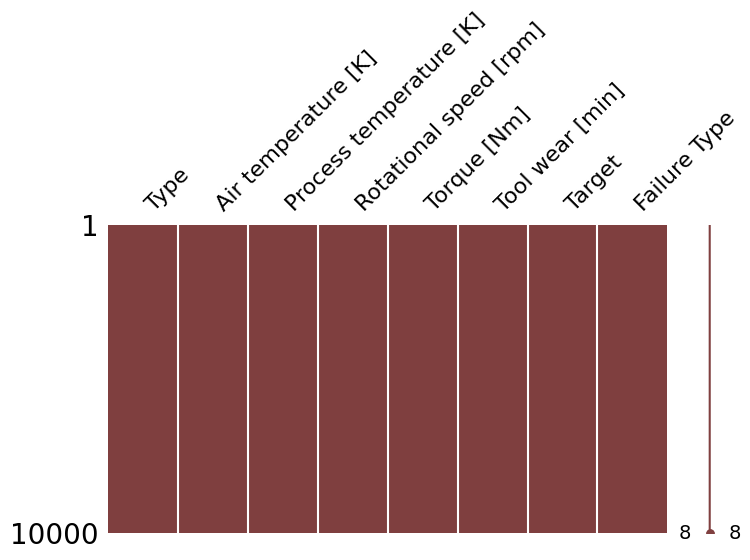

In [36]:
msno.matrix(df, color=(0.5, 0.25, 0.25), figsize=(8, 4));

In [37]:
df.duplicated().sum()

0

<a name='check-for-outliers'></a>

## **2. Check for Outliers**

In [38]:
def detect_outliers_IQR(d):
  for i in d:
    Q3, Q1 = np.percentile(df[i], [75 ,25])
    IQR = Q3 - Q1

    ul = Q3+1.5*IQR
    ll = Q1-1.5*IQR

    outliers = df[i][(df[i] > ul) | (df[i] < ll)]
    print(f'** {i} outlier points**', '\n', outliers, '\n')

detect_outliers_IQR(list(df.columns)[1:-2])

** Air temperature [K] outlier points** 
 Series([], Name: Air temperature [K], dtype: float64) 

** Process temperature [K] outlier points** 
 Series([], Name: Process temperature [K], dtype: float64) 

** Rotational speed [rpm] outlier points** 
 14      2035
50      2861
70      1924
101     1991
155     1987
        ... 
9865    2450
9871    1947
9886    1903
9926    1897
9939    2636
Name: Rotational speed [rpm], Length: 418, dtype: int64 

** Torque [Nm] outlier points** 
 50       4.6
194     10.7
380     12.8
463      4.2
603     71.6
        ... 
8398    12.1
8582    72.0
9084    75.4
9939    12.8
9974    68.2
Name: Torque [Nm], Length: 69, dtype: float64 

** Tool wear [min] outlier points** 
 Series([], Name: Tool wear [min], dtype: int64) 



In [39]:
def detect_outliers_zscore(df, columns, threshold=3):
    """
    Detects outliers in specified columns of a DataFrame using Z-score method.

    Parameters:
    - df: DataFrame containing data.
    - columns: List of column names to check for outliers.
    - threshold: Z-score threshold to define outliers (default is 3).

    Prints:
    - Outlier points for each column in the specified list.
    """
    for col in columns:
        # Calculate the Z-score for each value in the column
        z_scores = zscore(df[col].dropna())  # Drop NA values before calculating Z-score
        # Find indices of values where Z-score exceeds the threshold
        outliers = df[col][np.abs(z_scores) > threshold]
        print(f'** {col} outlier points**', '\n', outliers, '\n')

detect_outliers_zscore(df, list(df.columns)[1:-2], threshold=3.5)

** Air temperature [K] outlier points** 
 Series([], Name: Air temperature [K], dtype: float64) 

** Process temperature [K] outlier points** 
 Series([], Name: Process temperature [K], dtype: float64) 

** Rotational speed [rpm] outlier points** 
 50      2861
194     2678
344     2448
380     2564
463     2874
        ... 
9732    2231
9758    2271
9849    2312
9865    2450
9939    2636
Name: Rotational speed [rpm], Length: 112, dtype: int64 

** Torque [Nm] outlier points** 
 50       4.6
463      4.2
880     76.2
1784     3.8
7763    76.6
9084    75.4
Name: Torque [Nm], dtype: float64 

** Tool wear [min] outlier points** 
 Series([], Name: Tool wear [min], dtype: int64) 



We retain outliers in the dataset unless the machine learning models' performance are negatively impacted, ensuring we preserve valuable data insights and avoid unnecessary preprocessing.

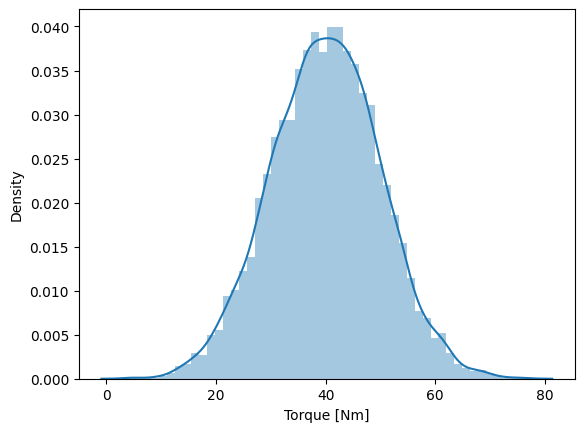

In [40]:
# Visualizing data to gain insights into the distribution and relationships between variables.
sns.distplot(df['Torque [Nm]']);

<a name='categorical-variables-encoding'></a>

## **3. Categorical Variables Encoding**

In [41]:
# Initialize the LabelEncoder
encoder = LabelEncoder()

# Fit and transform the 'Failure Type' column
df['Failure Type'] = encoder.fit_transform(df['Failure Type'])

# Show the mapping of original labels to encoded values
label_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
print("Label Mapping:", label_mapping)

Label Mapping: {'Heat Dissipation Failure': 0, 'No Failure': 1, 'Overstrain Failure': 2, 'Power Failure': 3, 'Random Failures': 4, 'Tool Wear Failure': 5}


In [42]:
# Perform one-hot encoding on the 'Type' column, dropping the first category to avoid multicollinearity
df = pd.get_dummies(df, columns=['Type'], prefix='Type', drop_first=True)

# Convert any boolean columns to integers (0 and 1)
# This ensures that the new columns contain 0 and 1 instead of False and True
for col in df.columns:
    if df[col].dtype == 'bool':
        df[col] = df[col].astype(int)

df.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,Type_L,Type_M
0,298.1,308.6,1551,42.8,0,0,1,0,1
1,298.2,308.7,1408,46.3,3,0,1,1,0
2,298.1,308.5,1498,49.4,5,0,1,1,0
3,298.2,308.6,1433,39.5,7,0,1,1,0
4,298.2,308.7,1408,40.0,9,0,1,1,0


<a name='dataset-splitting'></a>

## **4. Dataset Splitting**

In [43]:
X = df.drop(columns=['Target', 'Failure Type'])
y = df['Failure Type']
y_binary = df['Target']

In [44]:
# Splitting the dataset into training and testing sets to evaluate the model's performance on unseen data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train.shape, X_test.shape

((8500, 7), (1500, 7))

<a name='modeling-and-prediction'></a>

# **Modeling and Prediction**

In [45]:
CV = StratifiedKFold(n_splits=10, random_state=0, shuffle=True)

In [46]:
# Define helper functions to evaluate ML models
def evaluate_model(y_true, y_pred, model_name="Model"):
    """
    Evaluates the performance of a classification model and prints key metrics.

    Parameters:
        y_true (array-like): True labels.
        y_pred (array-like): Predicted labels by the model.
        model_name (str): Name of the model (for display purposes).
    """
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted') # 'weighted' for multi-class
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    print(f"{model_name} Model Performance:")
    print("="*40)
    print(f"Accuracy : {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall   : {recall:.4f}")
    print(f"F1 Score : {f1:.4f}")
    print("="*40)

    print("\nClassification Report:\n")
    print(classification_report(y_true, y_pred))



def plot_interactive_confusion_matrix(y_true, y_pred, title="Confusion Matrix"):
    """
    Plots a confusion matrix using Plotly for given true and predicted labels.

    Parameters:
    - y_true: array-like, shape (n_samples,)
        True labels of the dataset.
    - y_pred: array-like, shape (n_samples,)
        Predicted labels from the model.
    - title: str, optional (default="Confusion Matrix")
        Title for the plot.

    Returns:
    - fig: Plotly figure object of the confusion matrix.
    """
    # Compute the confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    labels = np.unique(y_true)  # Get unique labels from y_true for axis labels

    # Create a heatmap using Plotly
    fig = px.imshow(
        cm,
        text_auto=True,
        labels=dict(x="Predicted Label", y="True Label", color="Count"),
        x=labels,
        y=labels,
        title=title,
        color_continuous_scale="Blues"
    )

    # Update layout for better readability and square cells
    fig.update_layout(
        xaxis=dict(
            title="Predicted Label",
            tickmode="array",
            tickvals=labels,
            ticktext=[str(label) for label in labels],
            tickangle=-45  # Rotate x-axis labels if needed
        ),
        yaxis=dict(
            title="True Label",
            tickmode="array",
            tickvals=labels,
            ticktext=[str(label) for label in labels]
        ),
        title_x=0.5,  # Center title
        margin=dict(l=80, r=20, t=60, b=20),  # Add margin for spacing
        autosize=False,
        width=500,  # Set a specific width
        height=500  # Set the height equal to the width to make it square
    )

    return fig

<a name='model-1-logistic-regression'></a>

### **Model 1: Logistic Regression**

In [47]:
LR = LogisticRegression()
cross_val_LR_Acc = cross_val_score(LR, X, y, cv = CV, scoring = 'accuracy')
cross_val_LR_f1 = cross_val_score(LR, X, y, cv = CV, scoring = 'f1')
cross_val_LR_AUC = cross_val_score(LR, X, y, cv = CV, scoring = 'roc_auc_ovr')

In [48]:
LR.fit(X_train, y_train)
y_pred_LR = LR.predict(X_test)

# Coefficients for each feature
print("Coefficients of the Logistic Regression Model:", LR.coef_, "\n")

# Intercept term
print("Intercept of the Logistic Regression Model:", LR.intercept_)

Coefficients of the Logistic Regression Model: [[ 5.01532346e-02  3.00679899e-02 -1.14641981e-02 -1.10615333e-02
  -3.51168156e-02  5.09730574e-04 -3.75918553e-04]
 [ 1.63504128e-02  3.88951990e-02  1.87984761e-03 -1.35950747e-01
  -4.13012113e-02 -2.82898385e-03  2.00075420e-03]
 [ 1.65459950e-02  1.92864563e-02 -2.25562482e-02  4.23202097e-02
   9.70005283e-02  2.38678569e-03 -1.82097987e-03]
 [-2.98819930e-02 -3.25524074e-02  1.45522286e-02  1.39569952e-01
  -4.21840364e-02  1.29136081e-04  4.18307129e-04]
 [-1.17519455e-02 -1.22383019e-02  1.00924707e-02 -5.30146058e-03
  -6.23869568e-02 -3.11285244e-05 -3.22170019e-04]
 [-4.14157039e-02 -4.34589359e-02  7.49589940e-03 -2.95764208e-02
   8.39884919e-02 -1.65539974e-04  1.00007116e-04]] 

Intercept of the Logistic Regression Model: [ 6.92771766e-05  1.63925129e-04  6.37168150e-05 -1.09286218e-04
 -4.27730356e-05 -1.44859866e-04]


In [49]:
evaluate_model(y_test, y_pred_LR, model_name="Logistic Regression")

plot_interactive_confusion_matrix(y_test, y_pred_LR, title="<b>Confusion Matrix for Logistic Regression<b>")

Logistic Regression Model Performance:
Accuracy : 0.9720
Precision: 0.9555
Recall   : 0.9720
F1 Score : 0.9631

Classification Report:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.98      1.00      0.99      1452
           2       0.43      0.25      0.32        12
           3       0.86      0.50      0.63        12
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         7

    accuracy                           0.97      1500
   macro avg       0.38      0.29      0.32      1500
weighted avg       0.96      0.97      0.96      1500



<a name='model-2-decision-tree'></a>

### **Model 2: Decision Tree**

In [50]:
DT = DecisionTreeClassifier(random_state=42)
cross_val_DT_Acc = cross_val_score(DT, X, y, cv = CV, scoring = 'accuracy')
cross_val_DT_f1 = cross_val_score(DT, X, y, cv = CV, scoring = 'f1')
cross_val_DT_AUC = cross_val_score(DT, X, y, cv = CV, scoring = 'roc_auc_ovr')

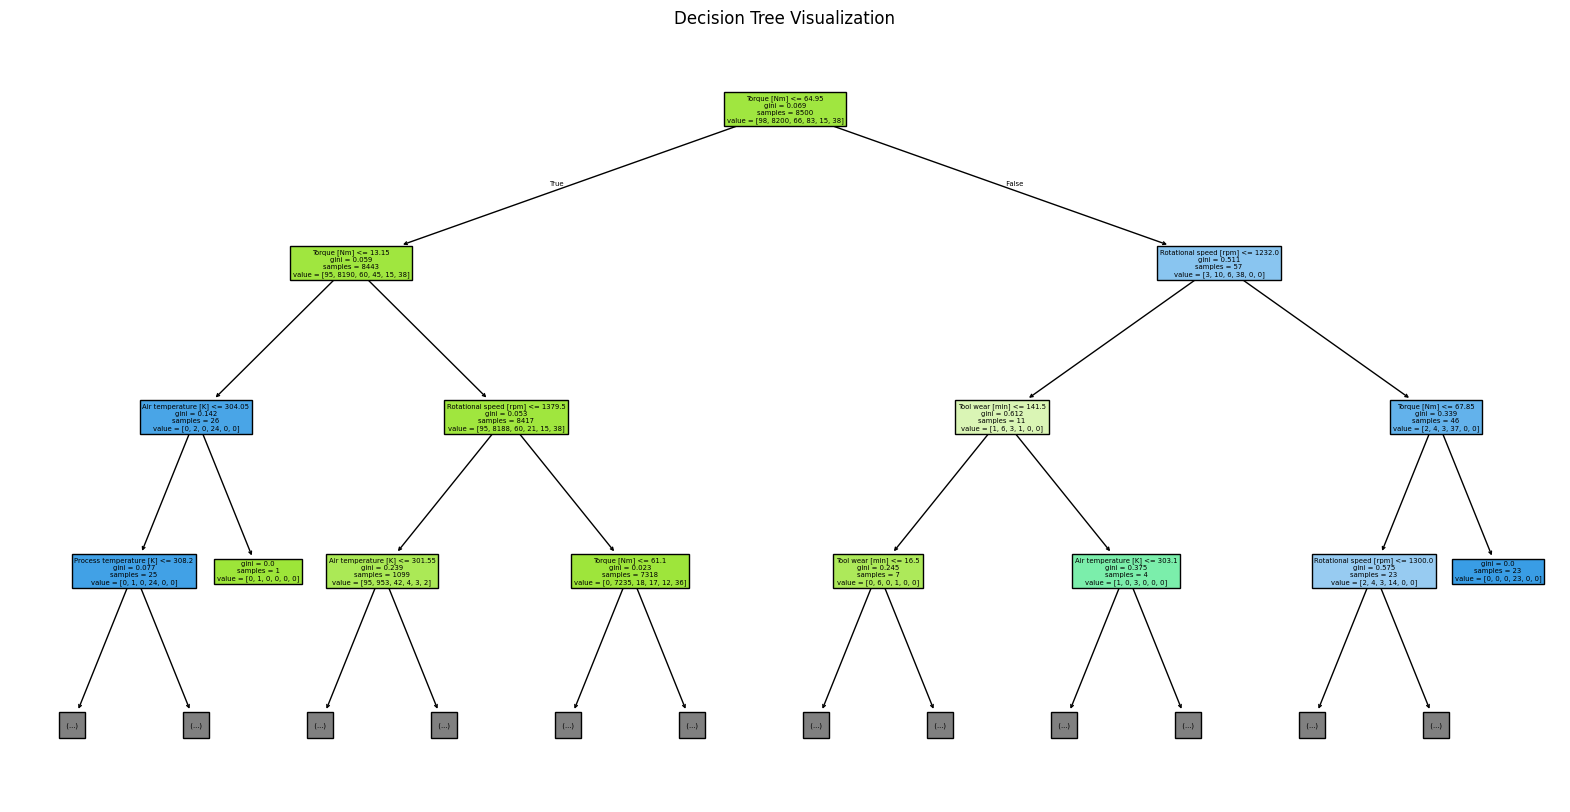

In [51]:
DT.fit(X_train, y_train)
y_pred_DT = DT.predict(X_test)

# Visualize the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(DT, feature_names=X_train.columns, filled=True, max_depth=3)
plt.title("Decision Tree Visualization")
plt.show()

In [52]:
evaluate_model(y_test, y_pred_DT, model_name="Decision Tree")

plot_interactive_confusion_matrix(y_test, y_pred_DT, title="<b>Confusion Matrix for Decision Tree<b>")

Decision Tree Model Performance:
Accuracy : 0.9753
Precision: 0.9766
Recall   : 0.9753
F1 Score : 0.9758

Classification Report:

              precision    recall  f1-score   support

           0       0.81      0.93      0.87        14
           1       0.99      0.99      0.99      1452
           2       0.45      0.42      0.43        12
           3       0.79      0.92      0.85        12
           4       0.00      0.00      0.00         3
           5       0.09      0.14      0.11         7

    accuracy                           0.98      1500
   macro avg       0.52      0.57      0.54      1500
weighted avg       0.98      0.98      0.98      1500



<a name='model-3-random-forest'></a>

### **Model 3: Random Forest**

In [80]:
RF_S = RandomForestClassifier(random_state = 42)
params_RF = {'n_estimators': list(range(50,100)), 'min_samples_leaf': list(range(1,5)), 'min_samples_split': list(range(1,5))}
grid_RF = RandomizedSearchCV(RF_S, param_distributions=params_RF, cv=5, n_jobs=-1, n_iter=20, random_state=42, return_train_score=True)
grid_RF.fit(X_train, y_train)
print('Best parameters:', grid_RF.best_estimator_)

Best parameters: RandomForestClassifier(n_estimators=63, random_state=42)


In [81]:
RF = RandomForestClassifier(n_estimators=63, random_state = 42)
cross_val_RF_Acc = cross_val_score(RF, X, y, cv = CV, scoring = 'accuracy')
cross_val_RF_f1 = cross_val_score(RF, X, y, cv = CV, scoring = 'f1')
cross_val_RF_AUC = cross_val_score(RF, X, y, cv = CV, scoring = 'roc_auc_ovr')

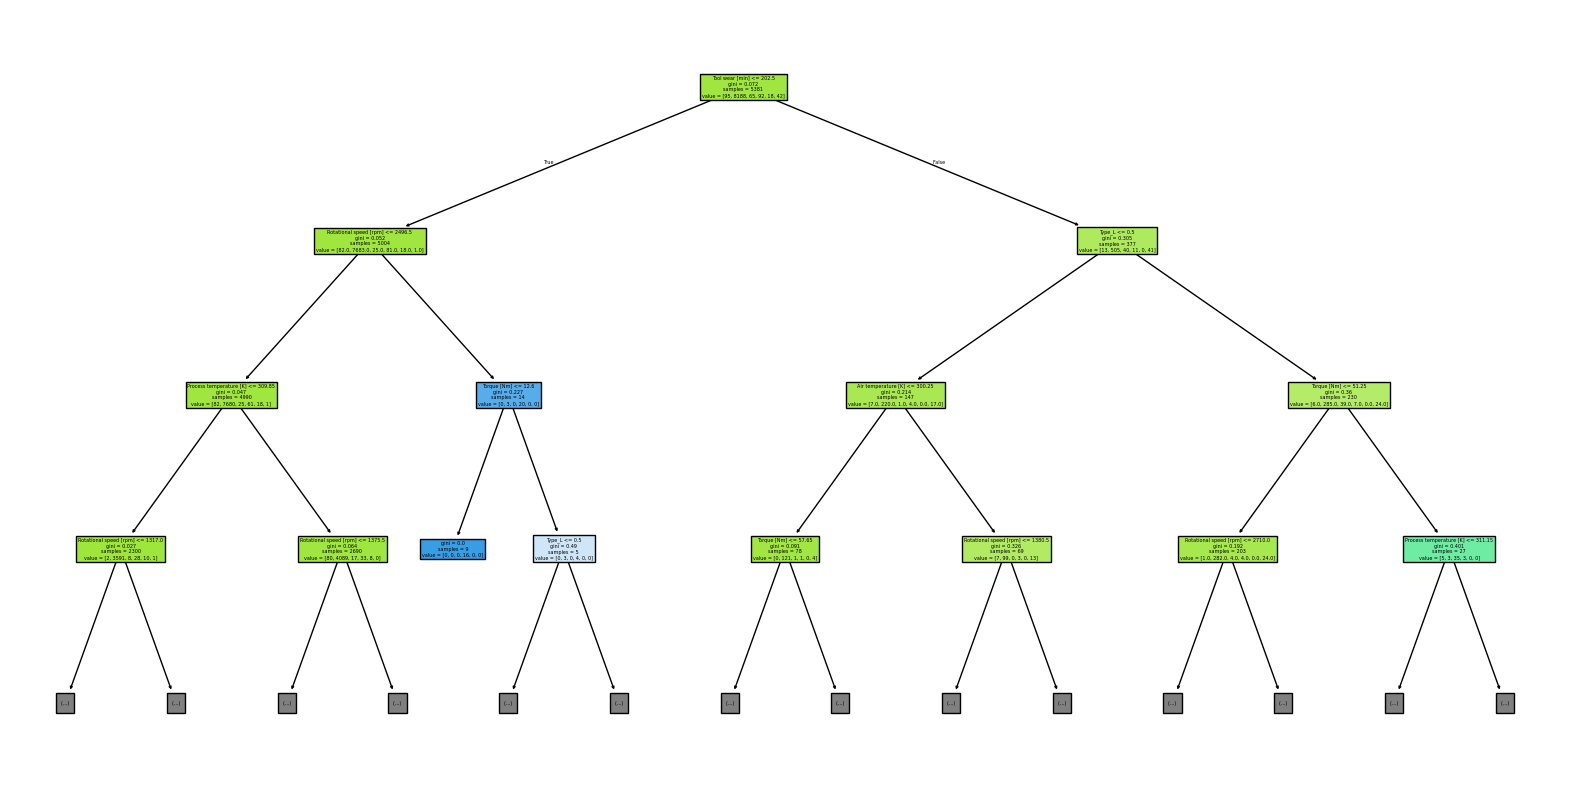

In [82]:
RF.fit(X_train, y_train)
y_pred_RF = RF.predict(X_test)

# Access the first tree in the forest
first_tree = RF.estimators_[0]
plt.figure(figsize=(20, 10))
plot_tree(first_tree, feature_names=X_train.columns, filled=True, max_depth=3)
plt.show()

In [83]:
evaluate_model(y_test, y_pred_RF, model_name="Random Forest")

plot_interactive_confusion_matrix(y_test, y_pred_RF, title="<b>Confusion Matrix for Random Forest<b>")

Random Forest Model Performance:
Accuracy : 0.9853
Precision: 0.9835
Recall   : 0.9853
F1 Score : 0.9821

Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.79      0.88        14
           1       0.99      1.00      0.99      1452
           2       1.00      0.50      0.67        12
           3       0.83      0.83      0.83        12
           4       0.00      0.00      0.00         3
           5       1.00      0.14      0.25         7

    accuracy                           0.99      1500
   macro avg       0.80      0.54      0.60      1500
weighted avg       0.98      0.99      0.98      1500



<a name='model-4-ada-boost'></a>

### **Model 4: Ada Boost**

In [57]:
AB_S = AdaBoostClassifier(random_state=42)
params_AB = {'n_estimators': list(range(50,100)), 'learning_rate':[0.01, 0.1, 1]}
grid_AB = RandomizedSearchCV(AB_S, param_distributions=params_AB, cv=5, n_jobs=-1, n_iter=20, random_state=42, return_train_score=True)
grid_AB.fit(X_train, y_train)
print('Best parameters:', grid_AB.best_estimator_)

Best parameters: AdaBoostClassifier(learning_rate=0.1, n_estimators=76, random_state=42)


In [58]:
AB = AdaBoostClassifier(learning_rate=0.1, n_estimators=76, random_state=42)
cross_val_AB_Acc = cross_val_score(AB, X, y, cv=CV, scoring='accuracy')
cross_val_AB_f1 = cross_val_score(AB, X, y, cv=CV, scoring='f1_weighted')
cross_val_AB_AUC = cross_val_score(AB, X, y, cv=CV, scoring='roc_auc_ovr')

In [59]:
AB.fit(X_train, y_train)
y_pred_AB = AB.predict(X_test)

In [60]:
evaluate_model(y_test, y_pred_AB, model_name="AdaBoost")

plot_interactive_confusion_matrix(y_test, y_pred_AB, title="<b>Confusion Matrix for AdaBoost<b>")

AdaBoost Model Performance:
Accuracy : 0.9687
Precision: 0.9435
Recall   : 0.9687
F1 Score : 0.9547

Classification Report:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.97      1.00      0.99      1452
           2       0.50      0.08      0.14        12
           3       0.00      0.00      0.00        12
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         7

    accuracy                           0.97      1500
   macro avg       0.25      0.18      0.19      1500
weighted avg       0.94      0.97      0.95      1500



<a name='model-5-knn'></a>

### **Model 5: KNN**

In [61]:
KNN_S = KNeighborsClassifier()
params_KNN = {'n_neighbors': list(range(1,20))}
grid_KNN = RandomizedSearchCV(KNN_S, param_distributions=params_KNN, cv=5, n_jobs=-1, n_iter=20, random_state=42, return_train_score=True)
grid_KNN.fit(X_train, y_train)
print('Best parameters:', grid_KNN.best_estimator_)

Best parameters: KNeighborsClassifier(n_neighbors=12)


In [62]:
KNN = KNeighborsClassifier(n_neighbors=12)
cross_val_KNN_Acc = cross_val_score(KNN, X, y, cv = CV, scoring = 'accuracy')
cross_val_KNN_f1 = cross_val_score(KNN, X, y, cv = CV, scoring = 'f1')
cross_val_KNN_AUC = cross_val_score(KNN, X, y, cv = CV, scoring = 'roc_auc_ovr')

In [63]:
KNN.fit(X_train, y_train)
y_pred_KNN = KNN.predict(X_test)

In [64]:
evaluate_model(y_test, y_pred_KNN, model_name="K-Nearest Neighbors")

plot_interactive_confusion_matrix(y_test, y_pred_KNN, title="<b>Confusion Matrix for K-Nearest Neighbors<b>")

K-Nearest Neighbors Model Performance:
Accuracy : 0.9680
Precision: 0.9468
Recall   : 0.9680
F1 Score : 0.9557

Classification Report:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.97      1.00      0.98      1452
           2       0.25      0.08      0.12        12
           3       0.67      0.17      0.27        12
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         7

    accuracy                           0.97      1500
   macro avg       0.31      0.21      0.23      1500
weighted avg       0.95      0.97      0.96      1500



<a name='model-6-svm'></a>

### **Model 6: SVM**

In [65]:
SVM = SVC(probability=True, random_state=42)  # Set probability=True if you need AUC scoring
cross_val_SVM_Acc = cross_val_score(SVM, X, y, cv=CV, scoring='accuracy')
cross_val_SVM_f1 = cross_val_score(SVM, X, y, cv=CV, scoring='f1_weighted')
cross_val_SVM_AUC = cross_val_score(SVM, X, y, cv=CV, scoring='roc_auc_ovr')

In [66]:
SVM.fit(X_train, y_train)
y_pred_SVM = SVM.predict(X_test)

In [67]:
evaluate_model(y_test, y_pred_SVM, model_name="SVM")

plot_interactive_confusion_matrix(y_test, y_pred_SVM, title="<b>Confusion Matrix for SVM<b>")

SVM Model Performance:
Accuracy : 0.9687
Precision: 0.9456
Recall   : 0.9687
F1 Score : 0.9538

Classification Report:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.97      1.00      0.98      1452
           2       0.00      0.00      0.00        12
           3       1.00      0.08      0.15        12
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         7

    accuracy                           0.97      1500
   macro avg       0.33      0.18      0.19      1500
weighted avg       0.95      0.97      0.95      1500



<a name='model-7-stacking'></a>

### **Model 7: Stacking**

In [68]:
estimators = [('DT', DT),
              ('RF', RF),
              ('LR', LR),
              ('KNN', KNN),
              ('SVM', SVM),
              ('AB', AB)]

Stack = StackingClassifier(estimators = estimators, final_estimator = MLPClassifier())
cross_val_Stack_Acc = cross_val_score(Stack, X, y, cv=CV, scoring='accuracy')
cross_val_Stack_f1 = cross_val_score(Stack, X, y, cv=CV, scoring='f1_weighted')
cross_val_Stack_AUC = cross_val_score(Stack, X, y, cv=CV, scoring='roc_auc_ovr')

In [69]:
Stack.fit(X_train, y_train)
y_pred_Stack = Stack.predict(X_test)

In [70]:
evaluate_model(y_test, y_pred_Stack, model_name="Stacking Classifier")

plot_interactive_confusion_matrix(y_test, y_pred_Stack, title="<b>Confusion Matrix for Stacking Classifier<b>")

Stacking Classifier Model Performance:
Accuracy : 0.9860
Precision: 0.9800
Recall   : 0.9860
F1 Score : 0.9829

Classification Report:

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        14
           1       0.99      1.00      0.99      1452
           2       0.83      0.83      0.83        12
           3       0.67      0.83      0.74        12
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         7

    accuracy                           0.99      1500
   macro avg       0.57      0.60      0.58      1500
weighted avg       0.98      0.99      0.98      1500



<a name='model-8-neural-networks'></a>

### **Model 8: Neural Networks**

Epoch 1/50
266/266 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.0317 - loss: 12.1593 - learning_rate: 1.0000e-06
Epoch 2/50
266/266 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5570 - loss: 2.5038 - learning_rate: 1.2023e-06
Epoch 3/50
266/266 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8884 - loss: 1.1097 - learning_rate: 1.4454e-06
Epoch 4/50
266/266 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9369 - loss: 1.2315 - learning_rate: 1.7378e-06
Epoch 5/50
266/266 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9557 - loss: 0.9815 - learning_rate: 2.0893e-06
Epoch 6/50
266/266 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9662 - loss: 0.7918 - learning_rate: 2.5119e-06
Epoch 7/50
266/266 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9612 - loss: 0.7392 - learning_rate: 3.0200e-06
Epoch 8/50
266/266 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9603 - loss: 0.5525 - learning_rate: 3.6308e-06
Epoch 9/50
266/266 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9604 - loss: 0.4219 -

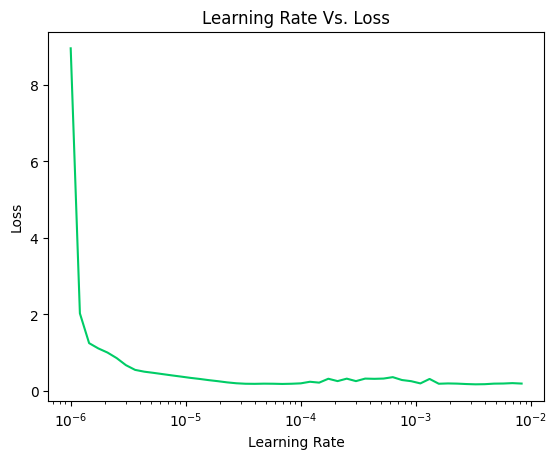

In [28]:
# One-hot encode the target labels (multi-class)
encoder = OneHotEncoder(sparse_output=False)  # Updated: sparse_output=False to ensure dense array
y_train_encoded = encoder.fit_transform(np.array(y_train).reshape(-1, 1))
y_test_encoded = encoder.transform(np.array(y_test).reshape(-1, 1))

# Convert to float32, which TensorFlow requires
y_train_encoded = y_train_encoded.astype(np.float32)
y_test_encoded = y_test_encoded.astype(np.float32)

# Define the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(y_train_encoded.shape[1], activation='softmax')  # Output layer with softmax
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # Use categorical cross-entropy for multi-class classification
              metrics=['accuracy'])

# Finding the best Learning Rate
lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-6 * 10**(epoch / 12.5))
history = model.fit(X_train, y_train_encoded, epochs=50, batch_size=32, callbacks=[lr_schedule])
lrs = 1e-6 * (10 ** (np.arange(50) / 12.5))
plt.semilogx(lrs, history.history['loss'], color = '#00cc66')
plt.xlabel('Learning Rate')
plt.ylabel('Loss')
plt.title('Learning Rate Vs. Loss');

In [30]:

# Clear the current TensorFlow session
#clear_session()

In [71]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 6)                   │             390 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 41,492 (162.08 KB)

 Trainable params: 13,830 (54.02 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 27,662 (108.06 KB)

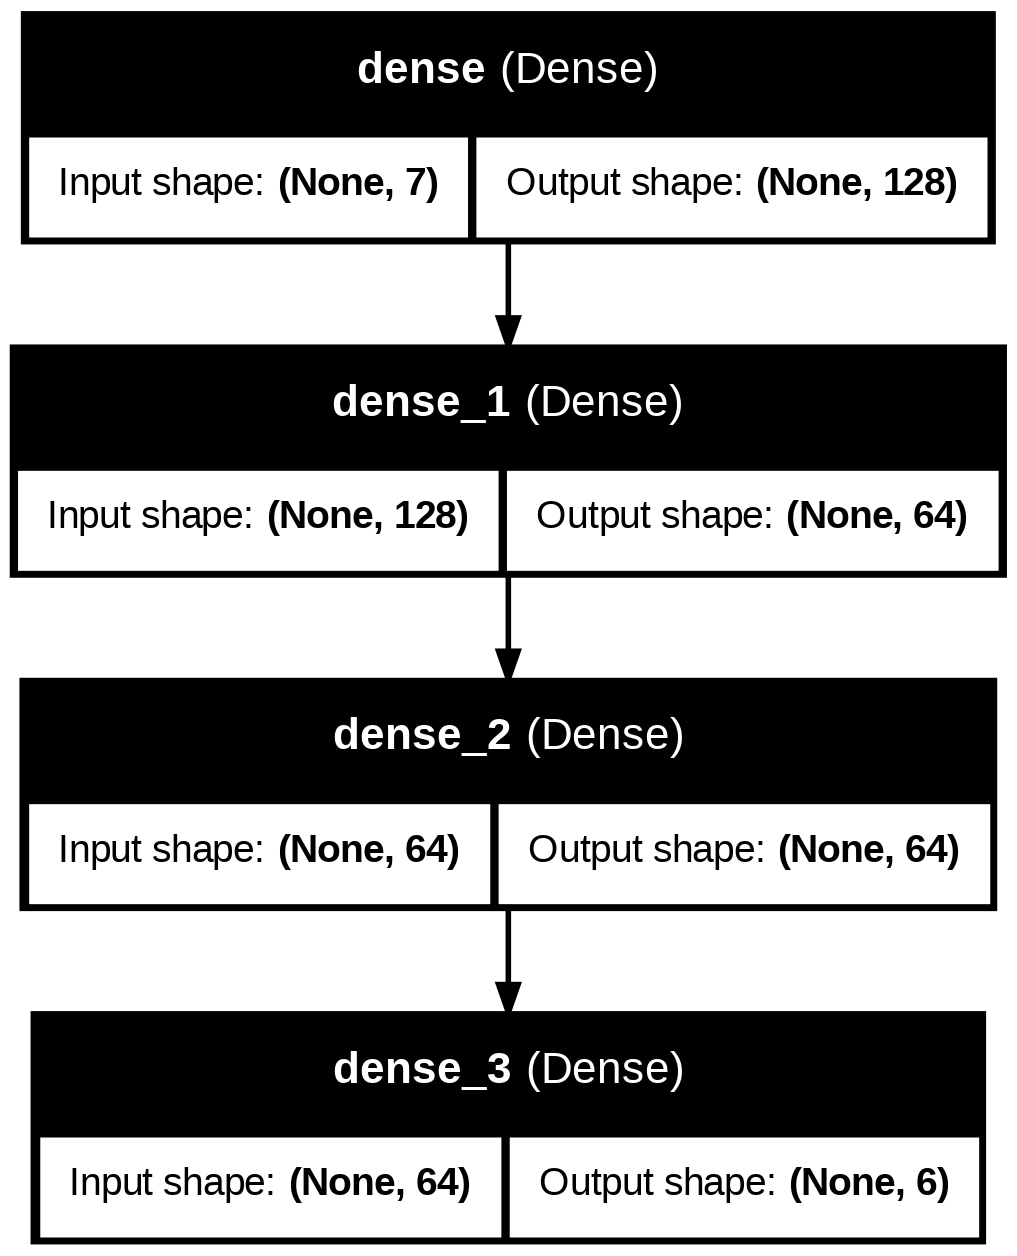

In [74]:
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

Epoch 1/30
120/120 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9694 - loss: 0.1189 - val_accuracy: 0.9659 - val_loss: 0.1170
Epoch 2/30
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9731 - loss: 0.1070 - val_accuracy: 0.9694 - val_loss: 0.1142
Epoch 3/30
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9703 - loss: 0.1255 - val_accuracy: 0.9718 - val_loss: 0.1210
Epoch 4/30
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9724 - loss: 0.1086 - val_accuracy: 0.9635 - val_loss: 0.1157
Epoch 5/30
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9713 - loss: 0.1084 - val_accuracy: 0.9718 - val_loss: 0.1227
Epoch 6/30
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9738 - loss: 0.1057 - val_accuracy: 0.9706 - val_loss: 0.1193
Epoch 7/30
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9672 - loss: 0.1317 - val_accuracy: 0.9682 - val_loss: 0.1137
Epoch 8/30
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9741 - loss: 0.1099 - val_accuracy: 0.

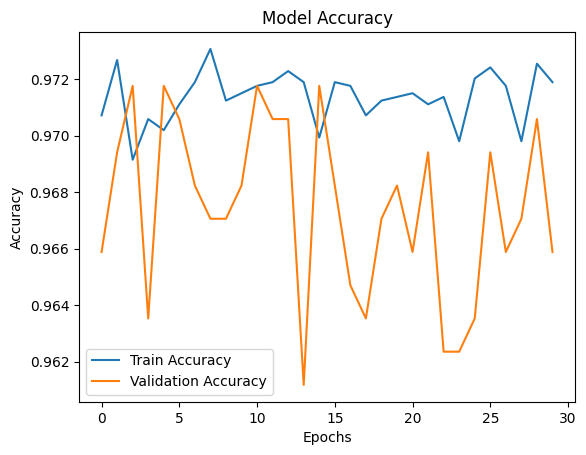

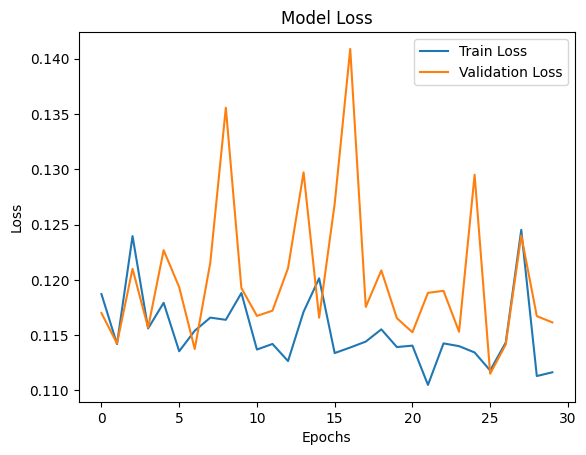

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

Classification Report:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.98      1.00      0.99      1452
           2       0.50      0.17      0.25        12
           3       0.80      0.67      0.73        12
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         7

    accuracy                           0.97      1500
   macro avg       0.38      0.31      0.33      1500
weighted avg       0.95      0.97      0.96      1500



In [31]:
# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=5*0.0001),
              loss='categorical_crossentropy',  # Use categorical cross-entropy for multi-class classification
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train_encoded, validation_split=0.1, epochs=30, batch_size=64, verbose=1)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test_encoded, verbose=0)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Plot accuracy
plt.figure()
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.figure()
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Predict and evaluate further
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)  # Get class with highest probability
y_test_classes = np.argmax(y_test_encoded, axis=1)

# Convert target names to strings for proper display
target_names = [str(int(c)) for c in encoder.categories_[0]]

print("\nClassification Report:\n")
print(classification_report(y_test_classes, y_pred, target_names=target_names))

<a name='feature-importance'></a>

# **Feature Importance**

In [ ]:
d = {'Features': X_train.columns, 'Feature Importance': RF.feature_importances_}
df = pd.DataFrame(d)
df_sorted = df.sort_values(by='Feature Importance', ascending = False)
df_sorted
df_sorted.style.background_gradient(cmap='Blues')

,Features,Feature Importance
3,Torque [Nm],0.314495
2,Rotational speed [rpm],0.233100
4,Tool wear [min],0.158202
0,Air temperature [K],0.138037
1,Process temperature [K],0.131508
5,Type_L,0.013324
6,Type_M,0.011334


In [ ]:
fig = px.bar(x=df_sorted['Feature Importance'], y=df_sorted['Features'], color_continuous_scale=px.colors.sequential.Blues,
             title='<b>Feature Importance Based on Random Forest<b>', text_auto='.4f', color=df_sorted['Feature Importance'])

fig.update_traces(marker=dict(line=dict(color='black', width=2)))
fig.update_layout({'yaxis': {'title':'Features'}, 'xaxis': {'title':'Feature Importance'}})

fig.show()

<a name='results'></a>

# **Results**

In [91]:
compare_models = [('Logistic Regression', cross_val_LR_Acc.mean(), cross_val_LR_f1.mean(), cross_val_LR_AUC.mean(), ''),
                  ('Decision Tree', cross_val_DT_Acc.mean(), cross_val_DT_f1.mean(), cross_val_DT_AUC.mean(), ''),
                  ('Random Forest', cross_val_RF_Acc.mean(), cross_val_RF_f1.mean(), cross_val_RF_AUC.mean(), ''),
                  ('Ada Boost', cross_val_AB_Acc.mean(), cross_val_AB_f1.mean(), cross_val_AB_AUC.mean(), ''),
                  ('KNN', cross_val_KNN_Acc.mean(), cross_val_KNN_f1.mean(), cross_val_KNN_AUC.mean(), ''),
                  ('SVM', cross_val_SVM_Acc.mean(), cross_val_SVM_f1.mean(), cross_val_SVM_AUC.mean(), ''),
                  ('Stacking', cross_val_Stack_Acc.mean(), cross_val_Stack_f1.mean(), cross_val_Stack_AUC.mean(), 'best model')]

In [92]:
compare = pd.DataFrame(data = compare_models, columns=['Model','Accuracy Mean', 'F1 Score Mean', 'AUC Score Mean', 'Description'])
compare.style.background_gradient(cmap='YlGn')

,Model,Accuracy Mean,F1 Score Mean,AUC Score Mean,Description
0,Logistic Regression,0.966200,nan,0.874067,
1,Decision Tree,0.976000,nan,0.760789,
2,Random Forest,0.981400,nan,0.888056,
3,Ada Boost,0.967200,0.954347,0.860625,
4,KNN,0.967900,nan,0.751090,
5,SVM,0.965900,0.949805,0.856485,
6,Stacking,0.980000,0.978036,0.913747,best model


In [88]:
d1 = {'Logistic Regression':cross_val_LR_Acc, 'Random Forest':cross_val_RF_Acc, 'KNN':cross_val_KNN_Acc, 'Decision Tree':cross_val_DT_Acc,
     'Ada Boost':cross_val_AB_Acc, 'Stacking':cross_val_Stack_Acc, 'SVM':cross_val_SVM_Acc}
d_accuracy = pd.DataFrame(data = d1)

fig = go.Figure()
fig.add_trace(go.Box(name='Logistic Regression', y=d_accuracy.iloc[:,0]))
fig.add_trace(go.Box(name='Random Forest', y=d_accuracy.iloc[:,1]))
fig.add_trace(go.Box(name='KNN', y=d_accuracy.iloc[:,2]))
fig.add_trace(go.Box(name='Decision Tree', y=d_accuracy.iloc[:,3]))
fig.add_trace(go.Box(name='Ada Boost', y=d_accuracy.iloc[:,4]))
fig.add_trace(go.Box(name='Stacking', y=d_accuracy.iloc[:,5]))
fig.add_trace(go.Box(name='SVM', y=d_accuracy.iloc[:,6]))

fig.update_traces(boxpoints='all', boxmean=True)

fig.update_layout(title_text='<b>Box Plots for Models Accuracy<b>')

In [89]:
d2 = {'Logistic Regression':cross_val_LR_AUC, 'Random Forest':cross_val_RF_AUC, 'KNN':cross_val_KNN_AUC, 'Decision Tree':cross_val_DT_AUC,
     'Ada Boost':cross_val_AB_AUC, 'Stacking':cross_val_Stack_AUC, 'SVM':cross_val_SVM_AUC}
d_auc = pd.DataFrame(data = d2)

fig = go.Figure()
fig.add_trace(go.Box(name='Logistic Regression', y=d_auc.iloc[:,0]))
fig.add_trace(go.Box(name='Random Forest', y=d_auc.iloc[:,1]))
fig.add_trace(go.Box(name='KNN', y=d_auc.iloc[:,2]))
fig.add_trace(go.Box(name='Decision Tree', y=d_auc.iloc[:,3]))
fig.add_trace(go.Box(name='Ada Boost', y=d_auc.iloc[:,4]))
fig.add_trace(go.Box(name='Stacking', y=d_auc.iloc[:,5]))
fig.add_trace(go.Box(name='SVM', y=d_auc.iloc[:,6]))

fig.update_traces(boxpoints='all', boxmean=True)

fig.update_layout(title_text='<b>Box Plots for Models AUC<b>')

In [90]:
# Dictionary of model names and their corresponding accuracy scores
accuracy_data = {
    'Logistic Regression': round(accuracy_score(y_test, y_pred_LR), 4),
    'Random Forest': round(accuracy_score(y_test, y_pred_RF), 4),
    'KNN': round(accuracy_score(y_test, y_pred_KNN), 4),
    'Decision Tree': round(accuracy_score(y_test, y_pred_DT), 4),
    'Ada Boost': round(accuracy_score(y_test, y_pred_AB), 4),
    'Stacking': round(accuracy_score(y_test, y_pred_Stack), 4),
    'SVM': round(accuracy_score(y_test, y_pred_SVM), 4),
    'Neural Network': round(accuracy_score(y_test, y_pred), 4)
}

# Convert dictionary to DataFrame for easier plotting
accuracy_df = pd.DataFrame(list(accuracy_data.items()), columns=['Model', 'Accuracy'])

# Define unique colors for each bar
colors = ['#636EFA', '#EF553B', '#00CC96', '#AB63FA', '#FFA15A', '#19D3F3', '#FF6692', '#82bd14']

# Create a bar plot with accuracy values inside each bar
fig = go.Figure(go.Bar(
    x=accuracy_df['Model'],
    y=accuracy_df['Accuracy'],
    text=accuracy_df['Accuracy'],
    textposition='inside',  # Position text inside the bar
    marker=dict(color=colors)  # Assign unique colors
))

# Update layout for better readability
fig.update_layout(
    title='<b>Accuracy of Models</b>',
    xaxis_title='Model',
    yaxis_title='Accuracy',
    yaxis=dict(tickformat=".4f")
)

fig.show()